# Importing the MNIST Dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

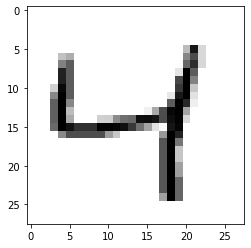

In [ ]:
plt.imshow(x_train[2],  cmap=plt.cm.binary)
plt.show()

# Model building

In [ ]:
from keras.models import Sequential
from  keras.layers import Dense

In [ ]:
model = Sequential()

model.add(keras.layers.Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  #Final O/P layer

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6091 - accuracy: 0.8701
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.9282
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2380 - accuracy: 0.9416
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1827 - accuracy: 0.9520
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1484 - accuracy: 0.9589
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1277 - accuracy: 0.9646
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1191 - accuracy: 0.9672
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1122 - accuracy: 0.9698
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9706
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.094

# Making Predictions and hypertuning

In [ ]:
(max_loss, max_accuracy) = model.evaluate(x_test, y_test)
print(max_loss)
print(max_accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9689
0.13264785706996918
0.9689000248908997


In [ ]:
predict = model.predict([x_test])

Consider rewriting this model with the Functional API.


In [ ]:
predict

array([[1.20832402e-12, 7.77348816e-08, 1.31307285e-08, ...,
        9.99993205e-01, 4.11459089e-09, 5.19987043e-06],
       [3.31941731e-11, 4.29837806e-13, 1.00000000e+00, ...,
        2.49476308e-12, 2.52946959e-14, 3.02142944e-19],
       [1.42458551e-17, 1.00000000e+00, 1.44818224e-09, ...,
        3.28216423e-08, 6.56172450e-09, 5.56022632e-12],
       ...,
       [7.85119425e-29, 7.86936660e-21, 3.65722907e-14, ...,
        1.84258313e-14, 1.54478328e-14, 6.18720080e-08],
       [1.84715507e-32, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.31827797e-19, 5.37834040e-32],
       [8.55922444e-10, 2.26964269e-22, 5.66307340e-23, ...,
        0.00000000e+00, 2.79621178e-14, 5.90867713e-20]], dtype=float32)

In [ ]:
#saving the model.
model.save("model_for_MNIST")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_for_MNIST/assets


In [ ]:
new_model = tf.keras.models.load_model("model_for_MNIST")

Enter any number for predicting the digit :76
3


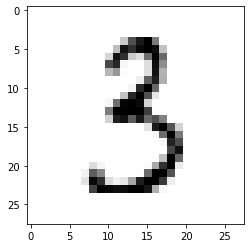

In [ ]:
choice = input("Enter any number for predicting the digit :")
choice_pred = np.argmax(predict[int(choice)])


print(choice_pred)
plt.imshow(x_test[int(choice)], cmap=plt.cm.binary)
plt.show()
